In [9]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
csvpath = os.path.join('Sales_Item_Merged.csv')

In [12]:
csv = "Sales_Item_Merged.csv"
sales_data = pd.read_csv(csv)
sales_data

,Silo,Silo_Description,Cust_ID,name_cust,id_st,Date_Invoice,id_item,descr_1,qty_ship,price_net,code_cat_prdt,category,flag_stat_item,code_comm,Item_Add_date
0,I,Industrial,22777,USHER OIL COMPANY,MI,3/18/2019,1000ABS550,ACTIV VIII,8,1750.56,10,AC8000 MOD,A,FNSG,6/12/2015
1,I,Industrial,22777,USHER OIL COMPANY,MI,5/21/2019,1000ABS550,ACTIV VIII,8,1838.08,10,AC8000 MOD,A,FNSG,6/12/2015
2,I,Industrial,22777,USHER OIL COMPANY,MI,2/11/2020,1000ABS550,ACTIV VIII,4,919.04,10,AC8000 MOD,A,FNSG,6/12/2015
3,I,Industrial,22777,USHER OIL COMPANY,MI,4/6/2020,1000ABS550,ACTIV VIII,4,919.04,10,AC8000 MOD,A,FNSG,6/12/2015
4,I,Industrial,22777,USHER OIL COMPANY,MI,8/19/2020,1000ABS550,ACTIV VIII,4,919.04,10,AC8000 MOD,A,FNSG,6/12/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23367,I,Industrial,1801,MSP INDUSTRIES,MI,9/27/2019,ZS401,BRUSH-SPIRAL WRAP SCRUB BRUSH,2,1139.50,ZS,PDQ PARTS,A,FNSG,9/24/2019
23368,J,JanSan,1000,SAMPLE ORDER,OH,10/21/2019,ZS402,BRUSH-HI DENSITY SCRUB BRUSH,2,822.50,ZS,PDQ PARTS,A,FNSG,10/11/2019
23369,J,JanSan,1000,SAMPLE ORDER,OH,10/21/2019,ZS403,BRUSH-SIDE SCRUB BRUSH,1,207.00,ZS,PDQ PARTS,A,FNSG,10/11/2019
23370,I,Industrial,12663,"LIBERTY STEEL INDUSTRIES, INC.",OH,10/24/2019,ZS404,BRUSH-GRIT SIDE SCRUB BRUSH.,1,469.00,ZS,PDQ PARTS,A,FNSG,10/14/2019


In [21]:

sales_data['year'] = pd.DatetimeIndex(sales_data['Date_Invoice']).year.astype(object)
sales_data['month'] = pd.DatetimeIndex(sales_data['Date_Invoice']).month.astype(object)

In [22]:
#2019 data frame
twenty_19_sales = sales_data.loc[sales_data['year']== 2019]


In [23]:
twenty_19_sales = twenty_19_sales.groupby(['id_item','descr_1','Item_Add_date']).sum()


In [24]:
#2020 data frame
twenty_20_sales = sales_data.loc[sales_data['year']== 2020]
twenty_20_sales.dtypes

Silo                 object
Silo_Description     object
Cust_ID              object
name_cust            object
id_st                object
Date_Invoice         object
id_item              object
descr_1              object
qty_ship              int64
price_net           float64
code_cat_prdt        object
category             object
flag_stat_item       object
code_comm            object
Item_Add_date        object
year                 object
month                object
dtype: object

In [25]:
twenty_20_sales = twenty_20_sales.groupby(['id_item','descr_1','Item_Add_date']).sum()

In [37]:
top_ten_2019_price = twenty_19_sales.sort_values(by = 'price_net', ascending = False)
top_ten_2019_price_labels = top_ten_2019_price.head(10).index
top_ten_2019_price.head(10)

,Silo,Silo_Description,Cust_ID,name_cust,id_st,Date_Invoice,id_item,descr_1,qty_ship,price_net,code_cat_prdt,category,flag_stat_item,code_comm,Item_Add_date,year,month
11356,S,Specialty,7770,GCP APPLIED TECH.,IL,10/23/2019,9276GRC050,PAB WB PRIMER(GREEN) (31790),768,76108.80,92,MISC SPEC,A,FNSG,5/12/2006,2019,10
11360,S,Specialty,7770,GCP APPLIED TECH.,IL,8/12/2019,9276GRC050,PAB WB PRIMER(GREEN) (31790),704,69766.40,92,MISC SPEC,A,FNSG,5/12/2006,2019,8
11362,S,Specialty,7770,GCP APPLIED TECH.,IL,6/25/2019,9276GRC050,PAB WB PRIMER(GREEN) (31790),668,66198.80,92,MISC SPEC,A,FNSG,5/12/2006,2019,6
4482,I,Industrial,11510,KARCHER NORTH AMERICA INC,AR,11/26/2019,1985KNA550,HOTSY BREAKTHROUGH! LA 9-PK SC,90,55803.60,AK,KARCHER,A,FNSG,10/15/2019,2019,11
11315,S,Specialty,7770,GCP APPLIED TECH.,IL,6/27/2019,9270GRC075,SURFACE CONDITINR 4000 (44028),681,55671.75,92,MISC SPEC,A,FNSG,6/1/2001,2019,6
8954,S,Specialty,17860,PRECISION LABORATORIES LLC,IL,2/28/2019,8238PLI043,SSC-11 433-01W,1390,53640.10,82,AG-MISC.,A,FNSG,3/19/2014,2019,2
8952,S,Specialty,17860,PRECISION LABORATORIES LLC,IL,9/16/2019,8238PLI042,FS RINSEOUT 433-01G,1458,49572.00,82,AG-MISC.,A,FNSG,2/28/2014,2019,9
1389,C,Contract,5657,SHARK NINJA OPERATING LLC,CA,9/11/2019,1368EUP089,SHARK HARD FLOOR RU820,6150,49200.00,13,NON8000NTR,A,FNSG,2/16/2015,2019,9
11317,S,Specialty,7770,GCP APPLIED TECH.,TN,7/11/2019,9270GRC075,SURFACE CONDITINR 4000 (44028),591,48314.25,92,MISC SPEC,A,FNSG,6/1/2001,2019,7
8911,S,Specialty,17860,PRECISION LABORATORIES LLC,IL,12/9/2019,8237PLI040,KLEEN UP (434-01I),1529,47918.86,82,AG-MISC.,A,FNSG,9/11/2001,2019,12


In [28]:

twenty_19_sales = sales_data.loc[sales_data['year']== 2019]
twenty_20_sales = sales_data.loc[sales_data['year']== 2020]
twenty_19_sales

,Silo,Silo_Description,Cust_ID,name_cust,id_st,Date_Invoice,id_item,descr_1,qty_ship,price_net,code_cat_prdt,category,flag_stat_item,code_comm,Item_Add_date,year,month
0,I,Industrial,22777,USHER OIL COMPANY,MI,3/18/2019,1000ABS550,ACTIV VIII,8,1750.56,10,AC8000 MOD,A,FNSG,6/12/2015,2019,3
1,I,Industrial,22777,USHER OIL COMPANY,MI,5/21/2019,1000ABS550,ACTIV VIII,8,1838.08,10,AC8000 MOD,A,FNSG,6/12/2015,2019,5
9,C,Contract,20930,CHARLOTTE PRODUCTS LTD.,IL,10/4/2019,1000CUS026,SAFE CLEAN 319000-18,26,487.76,10,AC8000 MOD,A,FNSG,1/19/2015,2019,10
10,C,Contract,20930,CHARLOTTE PRODUCTS LTD.,IL,3/4/2019,1000CUS026,SAFE CLEAN 319000-18,25,463.00,10,AC8000 MOD,A,FNSG,1/19/2015,2019,3
13,I,Industrial,16630,"ADREM,INC.",MI,4/25/2019,1000OID550,CLEAN EASE,8,1845.68,10,AC8000 MOD,A,FNSG,12/30/1994,2019,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23366,I,Industrial,12663,"LIBERTY STEEL INDUSTRIES, INC.",OH,9/23/2019,ZS400,BRUSH-SPIRAL WRAP GRIT BRUSH,2,1338.00,ZS,PDQ PARTS,A,FNSG,8/19/2019,2019,9
23367,I,Industrial,1801,MSP INDUSTRIES,MI,9/27/2019,ZS401,BRUSH-SPIRAL WRAP SCRUB BRUSH,2,1139.50,ZS,PDQ PARTS,A,FNSG,9/24/2019,2019,9
23368,J,JanSan,1000,SAMPLE ORDER,OH,10/21/2019,ZS402,BRUSH-HI DENSITY SCRUB BRUSH,2,822.50,ZS,PDQ PARTS,A,FNSG,10/11/2019,2019,10
23369,J,JanSan,1000,SAMPLE ORDER,OH,10/21/2019,ZS403,BRUSH-SIDE SCRUB BRUSH,1,207.00,ZS,PDQ PARTS,A,FNSG,10/11/2019,2019,10


In [34]:
top_ten_2019_price.reset_index()

,index,Silo,Silo_Description,Cust_ID,name_cust,id_st,Date_Invoice,id_item,descr_1,qty_ship,price_net,code_cat_prdt,category,flag_stat_item,code_comm,Item_Add_date,year,month
0,11356,S,Specialty,7770,GCP APPLIED TECH.,IL,10/23/2019,9276GRC050,PAB WB PRIMER(GREEN) (31790),768,76108.80,92,MISC SPEC,A,FNSG,5/12/2006,2019,10
1,11360,S,Specialty,7770,GCP APPLIED TECH.,IL,8/12/2019,9276GRC050,PAB WB PRIMER(GREEN) (31790),704,69766.40,92,MISC SPEC,A,FNSG,5/12/2006,2019,8
2,11362,S,Specialty,7770,GCP APPLIED TECH.,IL,6/25/2019,9276GRC050,PAB WB PRIMER(GREEN) (31790),668,66198.80,92,MISC SPEC,A,FNSG,5/12/2006,2019,6
3,4482,I,Industrial,11510,KARCHER NORTH AMERICA INC,AR,11/26/2019,1985KNA550,HOTSY BREAKTHROUGH! LA 9-PK SC,90,55803.60,AK,KARCHER,A,FNSG,10/15/2019,2019,11
4,11315,S,Specialty,7770,GCP APPLIED TECH.,IL,6/27/2019,9270GRC075,SURFACE CONDITINR 4000 (44028),681,55671.75,92,MISC SPEC,A,FNSG,6/1/2001,2019,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11317,16343,I,Industrial,2920,BRUSKE PRODUCTS,TX,5/13/2019,NFDMFR18EA,"18""X5""WIRE DUST MOP FRAME",1,2.75,NF,NuFiber,A,FNSG,5/21/2010,2019,5
11318,22533,J,JanSan,1845,AMERICAN OSMENT/IMPERIAL BAG,AL,6/21/2019,NFWM19GREA,"GRN WET/DRY 19"" VELCRO MOP",1,2.25,NF,NuFiber,O,FNSG,9/6/2012,2019,6
11319,22499,I,Industrial,2920,BRUSKE PRODUCTS,MS,8/30/2019,NFWM19BUEA,"19""LOW NAP BLUE C STYLE VELCRO",1,2.25,NF,NuFiber,A,FNSG,8/1/2012,2019,8
11320,19413,J,JanSan,15730,NORTH AMERICAN CORPORATION,IL,1/14/2019,NFSAVE-18BLU,"18"" LOW NAP BLUE ""C"" STYLE VEL",1,1.75,NF,NuFiber,A,FNSG,5/18/2017,2019,1


In [39]:
top_ten_2019_price.head()

,Silo,Silo_Description,Cust_ID,name_cust,id_st,Date_Invoice,id_item,descr_1,qty_ship,price_net,code_cat_prdt,category,flag_stat_item,code_comm,Item_Add_date,year,month
11356,S,Specialty,7770,GCP APPLIED TECH.,IL,10/23/2019,9276GRC050,PAB WB PRIMER(GREEN) (31790),768,76108.80,92,MISC SPEC,A,FNSG,5/12/2006,2019,10
11360,S,Specialty,7770,GCP APPLIED TECH.,IL,8/12/2019,9276GRC050,PAB WB PRIMER(GREEN) (31790),704,69766.40,92,MISC SPEC,A,FNSG,5/12/2006,2019,8
11362,S,Specialty,7770,GCP APPLIED TECH.,IL,6/25/2019,9276GRC050,PAB WB PRIMER(GREEN) (31790),668,66198.80,92,MISC SPEC,A,FNSG,5/12/2006,2019,6
4482,I,Industrial,11510,KARCHER NORTH AMERICA INC,AR,11/26/2019,1985KNA550,HOTSY BREAKTHROUGH! LA 9-PK SC,90,55803.60,AK,KARCHER,A,FNSG,10/15/2019,2019,11
11315,S,Specialty,7770,GCP APPLIED TECH.,IL,6/27/2019,9270GRC075,SURFACE CONDITINR 4000 (44028),681,55671.75,92,MISC SPEC,A,FNSG,6/1/2001,2019,6


<AxesSubplot:title={'center':'Top Products 2019 by price'}, xlabel='Item_Add_date', ylabel='price_net'>

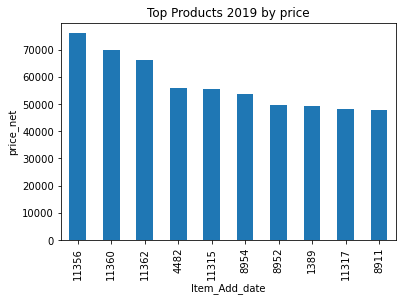

In [40]:
plot_2019 = top_ten_2019_price['price_net'].head(10).plot(kind="bar")
plot_2019.set_xlabel("Item_Add_date")
plot_2019.set_ylabel("price_net")
plot_2019.set_title("Top Products 2019 by price")
plot_2019


In [127]:
top_ten_2019_price.describe()

,qty_ship,price_net
count,1194.000000,1.194000e+03
mean,2164.098827,1.845725e+04
std,19477.121953,8.983974e+04
min,1.000000,3.500000e+00
25%,8.000000,6.735900e+02
50%,40.000000,2.644685e+03
75%,210.000000,9.394650e+03
max,570819.000000,2.154238e+06


In [128]:
#Regression of 2019 qty vs price
import pandas as pd
import statsmodels.formula.api as sm

result = sm.ols(formula="price_net ~ qty_ship", data=top_ten_2019_price).fit()
print(result.params)
print(result.summary())

Intercept    13215.259119
qty_ship         2.422251
dtype: float64
                            OLS Regression Results                            
Dep. Variable:              price_net   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     453.9
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           1.34e-85
Time:                        20:26:58   Log-Likelihood:                -15120.
No. Observations:                1194   AIC:                         3.024e+04
Df Residuals:                    1192   BIC:                         3.025e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [129]:
d = np.polyfit(top_ten_2019_price['qty_ship'],top_ten_2019_price['price_net'],1)
f = np.poly1d(d)

In [130]:
top_ten_2019_price.insert(2,'Treg2', f(top_ten_2019_price['qty_ship']))

In [156]:
top_ten_2019_price.head(10)

,,,qty_ship,price_net,Treg2
id_item,descr_1,Item_Add_date,,,
1600NUC040,NU-BRITE COIL CLNR (4291-08),12/30/1994,135086,2154237.70,3.404275e+05
6378SEV034,22810 7GEN DISF MULTI SURF,9/24/2014,205989,1434360.43,5.121724e+05
8289PLI600,BORDER 8L 331-TK LAMBERTI,6/18/2015,570819,696399.18,1.395882e+06
1680NUC030,CAL BLUE PLUS (4182-24),7/16/2018,16740,567486.00,5.376374e+04
1600NUC020,NU-BRITE (4291-05),12/30/1994,39514,538575.82,1.089281e+05
LW80MAP610,ACTIV 8000,7/25/2013,110,518650.00,1.348171e+04
1620NUC040,EVAP POW'R-C (4168-08),12/30/1994,29394,504694.98,8.441491e+04
8289PLI612,BORDER 8L STORAGE 331-BK,2/21/2014,1077,390951.00,1.582402e+04
1616NUC040,TRI-POW'R COIL HD (4371-88),12/15/1999,24899,383652.73,7.352689e+04


<AxesSubplot:xlabel='qty_ship', ylabel='price_net'>

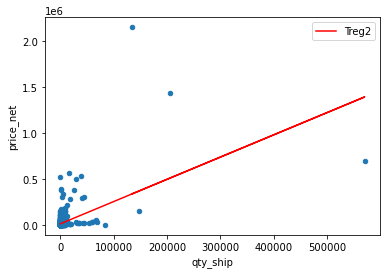

In [132]:
ax = top_ten_2019_price.plot.scatter(x = 'qty_ship',y='price_net')
top_ten_2019_price.plot(x='qty_ship', y='Treg2',color='Red',ax=ax)

In [158]:
#ax = top_ten_2019_price.plot.scatter(x = 'qty_ship',y='price_net')
#top_ten_2019_price.plot(x='qty_ship', y='Treg2',color='Red',ax=ax)
#plt.annotate('qty_ship', xy=(200000, 200000))
#plot()

#(slope, intercept, rvalue, pvalue, stderr) = linregress('x_values', y_values)

In [159]:
top_ten_2020_price = twenty_20_sales.sort_values(by = 'price_net', ascending = False)
top_ten_2020_price_labels = top_ten_2020_price.head(10)
top_ten_2020_price.head(10)


,,,qty_ship,price_net
id_item,descr_1,Item_Add_date,,
1805EUP010,SHARK COMET VCM12 WATERFALL,1/12/2020,90190,2931175.00
1600NUC040,NU-BRITE COIL CLNR (4291-08),12/30/1994,114768,1825958.88
6378SEV034,22810 7GEN DISF MULTI SURF,9/24/2014,148560,1175026.38
7073MMM030,3M TB QUAT DISINFECTANT,7/29/2020,137873,1126422.41
1805EUP080,SHARK COMET VCM60 WATERFALL,1/12/2020,149567,1112778.82
6378SEV037,22810 SEV DISF MULTI SURF,5/21/2020,121394,965766.16
8289PLI600,BORDER 8L 331-TK LAMBERTI,6/18/2015,519108,633311.76
1680NUC030,CAL BLUE PLUS (4182-24),7/16/2018,14587,494963.58
8289PLI612,BORDER 8L STORAGE 331-BK,2/21/2014,1245,454863.75


In [160]:
top_ten_2020_price.describe()

,qty_ship,price_net
count,1448.000000,1.448000e+03
mean,2497.915055,2.383792e+04
std,18268.735583,1.180548e+05
min,1.000000,3.410000e+00
25%,10.000000,9.652500e+02
50%,53.000000,3.318470e+03
75%,272.250000,1.122602e+04
max,519108.000000,2.931175e+06


<AxesSubplot:title={'center':'Top Products 2020 by price'}, xlabel='Item_Add_date', ylabel='price_net'>

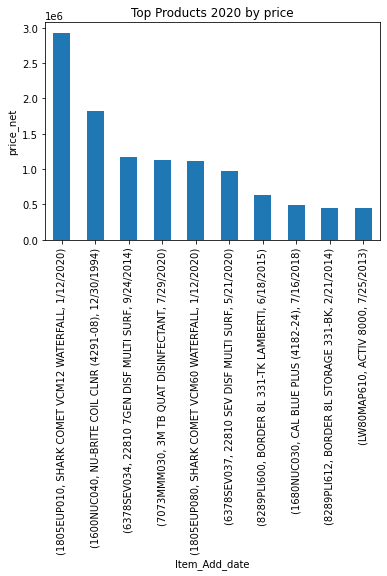

In [161]:
plot_2020 = top_ten_2020_price['price_net'].head(10).plot(kind="bar")
plot_2020.set_xlabel("Item_Add_date")
plot_2020.set_ylabel("price_net")
plot_2020.set_title("Top Products 2020 by price")

plot_2020

In [162]:
#Regression of 2020 qty vs price
import pandas as pd
import statsmodels.formula.api as sm

result = sm.ols(formula="price_net ~ qty_ship", data=top_ten_2020_price).fit()
print(result.params)
print(result.summary())

Intercept    15885.988759
qty_ship         3.183427
dtype: float64
                            OLS Regression Results                            
Dep. Variable:              price_net   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     463.4
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           2.22e-89
Time:                        23:30:33   Log-Likelihood:                -18764.
No. Observations:                1448   AIC:                         3.753e+04
Df Residuals:                    1446   BIC:                         3.754e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [163]:
d = np.polyfit(top_ten_2020_price['qty_ship'],top_ten_2020_price['price_net'],1)
f = np.poly1d(d)

In [164]:
top_ten_2020_price.insert(1,'Treg4', f(top_ten_2020_price['qty_ship']))

In [165]:
top_ten_2020_price.head()

,,,qty_ship,Treg4,price_net
id_item,descr_1,Item_Add_date,,,
1805EUP010,SHARK COMET VCM12 WATERFALL,1/12/2020,90190,302999.259752,2931175.00
1600NUC040,NU-BRITE COIL CLNR (4291-08),12/30/1994,114768,381241.525796,1825958.88
6378SEV034,22810 7GEN DISF MULTI SURF,9/24/2014,148560,488815.887182,1175026.38
7073MMM030,3M TB QUAT DISINFECTANT,7/29/2020,137873,454794.604034,1126422.41
1805EUP080,SHARK COMET VCM60 WATERFALL,1/12/2020,149567,492021.598058,1112778.82


<AxesSubplot:xlabel='qty_ship', ylabel='price_net'>

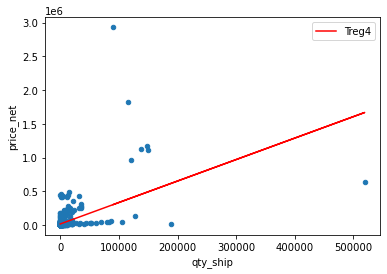

In [141]:
ax = top_ten_2020_price.plot.scatter(x = 'qty_ship',y='price_net')
top_ten_2020_price.plot(x='qty_ship', y='Treg4',color='Red',ax=ax)

In [170]:
top_ten_Add_Date_2019 = top_ten_2019_price.sort_values(by = 'price_net', ascending = False)
twenty19_labels = top_ten_Add_Date_2019.head(10).index
print(twenty19_labels)

MultiIndex([('1600NUC040',  'NU-BRITE COIL CLNR (4291-08)', '12/30/1994'),
            ('6378SEV034',    '22810 7GEN DISF MULTI SURF',  '9/24/2014'),
            ('8289PLI600',     'BORDER 8L 331-TK LAMBERTI',  '6/18/2015'),
            ('1680NUC030',       'CAL BLUE PLUS (4182-24)',  '7/16/2018'),
            ('1600NUC020',            'NU-BRITE (4291-05)', '12/30/1994'),
            ('LW80MAP610',                    'ACTIV 8000',  '7/25/2013'),
            ('1620NUC040',        'EVAP POW'R-C (4168-08)', '12/30/1994'),
            ('8289PLI612',      'BORDER 8L STORAGE 331-BK',  '2/21/2014'),
            ('1616NUC040',   'TRI-POW'R COIL HD (4371-88)', '12/15/1999'),
            ('3187RGC619', '533 RELEASE AGENT(CAGED TOTE)',   '6/7/2011')],
           names=['id_item', 'descr_1', 'Item_Add_date'])


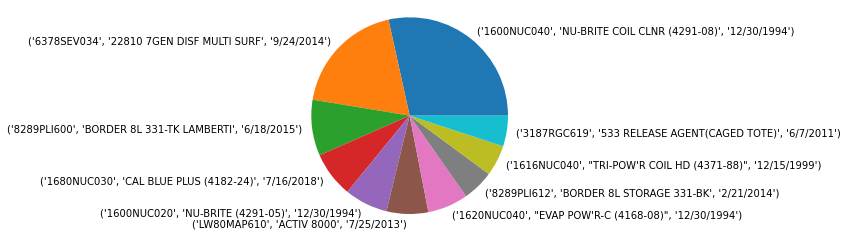

In [171]:
plt.pie(top_ten_Add_Date_2019['price_net'].head(10), labels = twenty19_labels)
plt.axis("equal")
plt.show()

In [144]:
top_ten_Add_Date_2020 = top_ten_2020_price.sort_values(by = 'price_net', ascending = False)
twenty20_labels = top_ten_Add_Date_2020.head(10).index
print(twenty20_labels)

MultiIndex([('1805EUP010',  'SHARK COMET VCM12 WATERFALL',  '1/12/2020'),
            ('1600NUC040', 'NU-BRITE COIL CLNR (4291-08)', '12/30/1994'),
            ('6378SEV034',   '22810 7GEN DISF MULTI SURF',  '9/24/2014'),
            ('7073MMM030',      '3M TB QUAT DISINFECTANT',  '7/29/2020'),
            ('1805EUP080',  'SHARK COMET VCM60 WATERFALL',  '1/12/2020'),
            ('6378SEV037',    '22810 SEV DISF MULTI SURF',  '5/21/2020'),
            ('8289PLI600',    'BORDER 8L 331-TK LAMBERTI',  '6/18/2015'),
            ('1680NUC030',      'CAL BLUE PLUS (4182-24)',  '7/16/2018'),
            ('8289PLI612',     'BORDER 8L STORAGE 331-BK',  '2/21/2014'),
            ('LW80MAP610',                   'ACTIV 8000',  '7/25/2013')],
           names=['id_item', 'descr_1', 'Item_Add_date'])


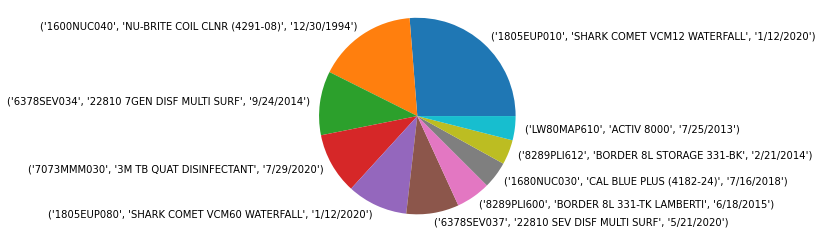

In [145]:
plt.pie(top_ten_Add_Date_2020['price_net'].head(10), labels = twenty20_labels)
plt.axis("equal")
plt.show()

In [146]:
top_ten_Add_Date_2019 = top_ten_2019_price.sort_values(by = 'qty_ship', ascending = False)
twenty19_labels = top_ten_Add_Date_2019.head(10).index
print(twenty19_labels)

MultiIndex([('8289PLI600',      'BORDER 8L 331-TK LAMBERTI',  '6/18/2015'),
            ('6378SEV034',     '22810 7GEN DISF MULTI SURF',  '9/24/2014'),
            ('8262PLI600',     'FS AMS MAX DR BULK 339-TKG',  '6/20/2018'),
            ('1600NUC040',   'NU-BRITE COIL CLNR (4291-08)', '12/30/1994'),
            ('8289PLI601',      'BORDER 8L LAMBERTI 331-TK',  '6/30/2015'),
            ('NFCL16RDEA', 'PINK 300GSM 16"CLOTH RD CORNER',  '5/24/2010'),
            ('NFCL16BLEA',  'NUFIBER GLASS/MIRR 16X16 BLUE',  '1/27/2010'),
            ('NFCL16BUEA', 'BLUE 300GSM 16"CLOTH RD CORNER',  '5/21/2010'),
            ('NFCL16GREA', 'GREEN 300GSM 16"CLTH RD CORNER',  '1/27/2010'),
            ('NFCLLWBUEA',     'BLUE 16"CLOTH ROUND CORNER',   '6/2/2011')],
           names=['id_item', 'descr_1', 'Item_Add_date'])


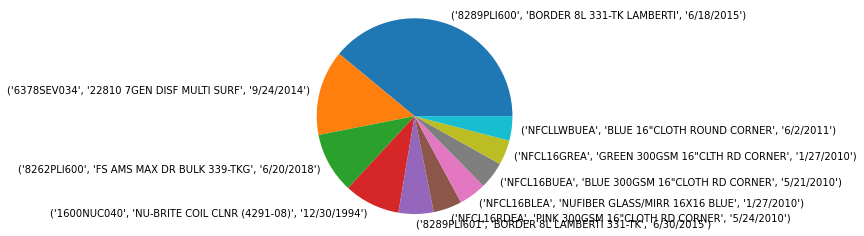

In [147]:
plt.pie(top_ten_Add_Date_2019['qty_ship'].head(10), labels = twenty19_labels)
plt.axis("equal")
plt.show()

In [148]:
top_ten_Add_Date_2020 = top_ten_2020_price.sort_values(by = 'qty_ship', ascending = False)
twenty20_labels = top_ten_Add_Date_2020.head(10).index
print(twenty20_labels)

MultiIndex([('8289PLI600',    'BORDER 8L 331-TK LAMBERTI',  '6/18/2015'),
            ('8289PLI601',    'BORDER 8L LAMBERTI 331-TK',  '6/30/2015'),
            ('1805EUP080',  'SHARK COMET VCM60 WATERFALL',  '1/12/2020'),
            ('6378SEV034',   '22810 7GEN DISF MULTI SURF',  '9/24/2014'),
            ('7073MMM030',      '3M TB QUAT DISINFECTANT',  '7/29/2020'),
            ('8262PLI600',   'FS AMS MAX DR BULK 339-TKG',  '6/20/2018'),
            ('6378SEV037',    '22810 SEV DISF MULTI SURF',  '5/21/2020'),
            ('1600NUC040', 'NU-BRITE COIL CLNR (4291-08)', '12/30/1994'),
            ('NFCL12BUEA',     'BLUE 12'CLOTH RND CORNER',  '5/27/2010'),
            ('1805EUP010',  'SHARK COMET VCM12 WATERFALL',  '1/12/2020')],
           names=['id_item', 'descr_1', 'Item_Add_date'])


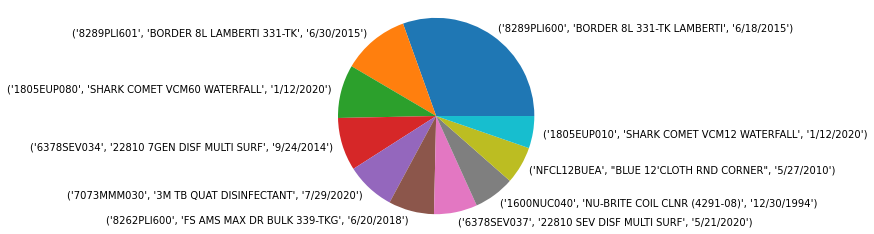

In [155]:
plt.pie(top_ten_Add_Date_2020['qty_ship'].head(10), labels = twenty20_labels)
plt.axis("equal")
plt.show()

In [150]:
# The unique method shows every element of the series that appears only once
unique = df["descr_1"].unique()
unique

array(['ACTIV VIII', 'BERKEL MIDWEST FRYER CLEANER',
       'SAFE CLEAN 319000-18', ..., 'BRUSH-HI DENSITY SCRUB BRUSH',
       'BRUSH-SIDE SCRUB BRUSH', 'BRUSH-GRIT SIDE SCRUB BRUSH.'],
      dtype=object)

In [151]:
## Reorganizing the columns using double brackets
df = pd.read_csv(csvpath)
organized_df = df[["descr_1", "Item_Add_date", "Date_Invoice", "qty_ship", "price_net", "name_cust"]]
organized_df.head()


,descr_1,Item_Add_date,Date_Invoice,qty_ship,price_net,name_cust
0,ACTIV VIII,6/12/2015,3/18/2019,8,1750.56,USHER OIL COMPANY
1,ACTIV VIII,6/12/2015,5/21/2019,8,1838.08,USHER OIL COMPANY
2,ACTIV VIII,6/12/2015,2/11/2020,4,919.04,USHER OIL COMPANY
3,ACTIV VIII,6/12/2015,4/6/2020,4,919.04,USHER OIL COMPANY
4,ACTIV VIII,6/12/2015,8/19/2020,4,919.04,USHER OIL COMPANY
